# 공공 Open API

* 공공 데이터 이용방법
  - https://www.data.go.kr
  - 회원가입 -> 로그인 ->  운영 계정 활용신청 -> 승인 -> 인증키 발급받음

    
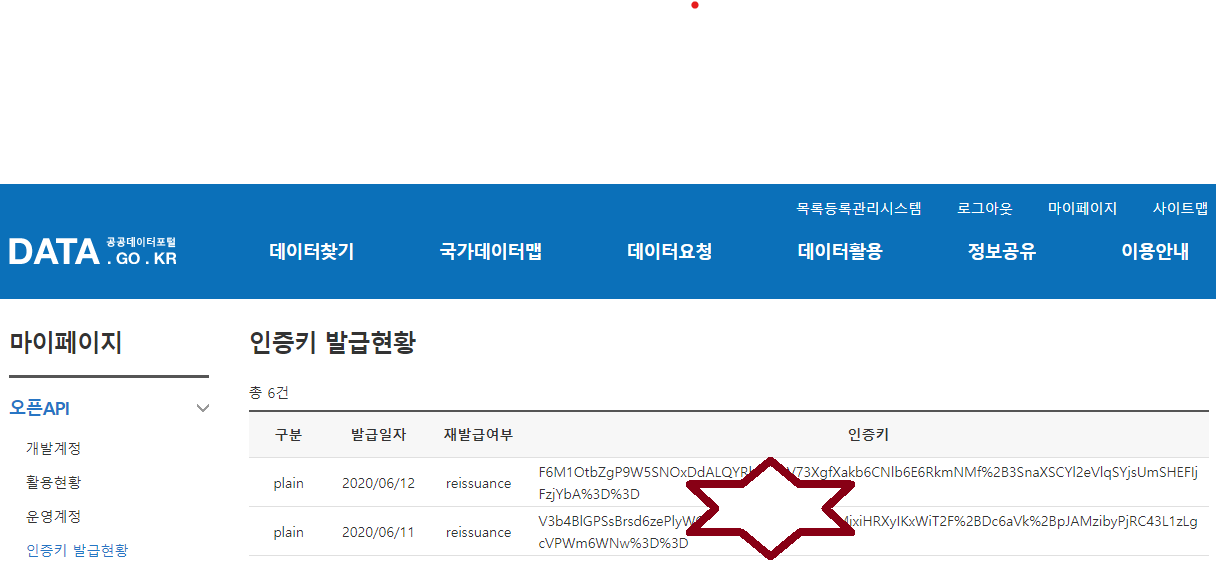 

- JSON 이외에 XML 포멧으로 데이터를 다루는 경우도 많음
    - XML 관련 내용은 '다양한 데이터 읽기 - XML 파일' 참조

## 미세먼지 시도별 실시간 측정정보 조회

* 한국환경공단_대기오염정보 신청

### 대기오염 정보 활용 신청/인증키 획득

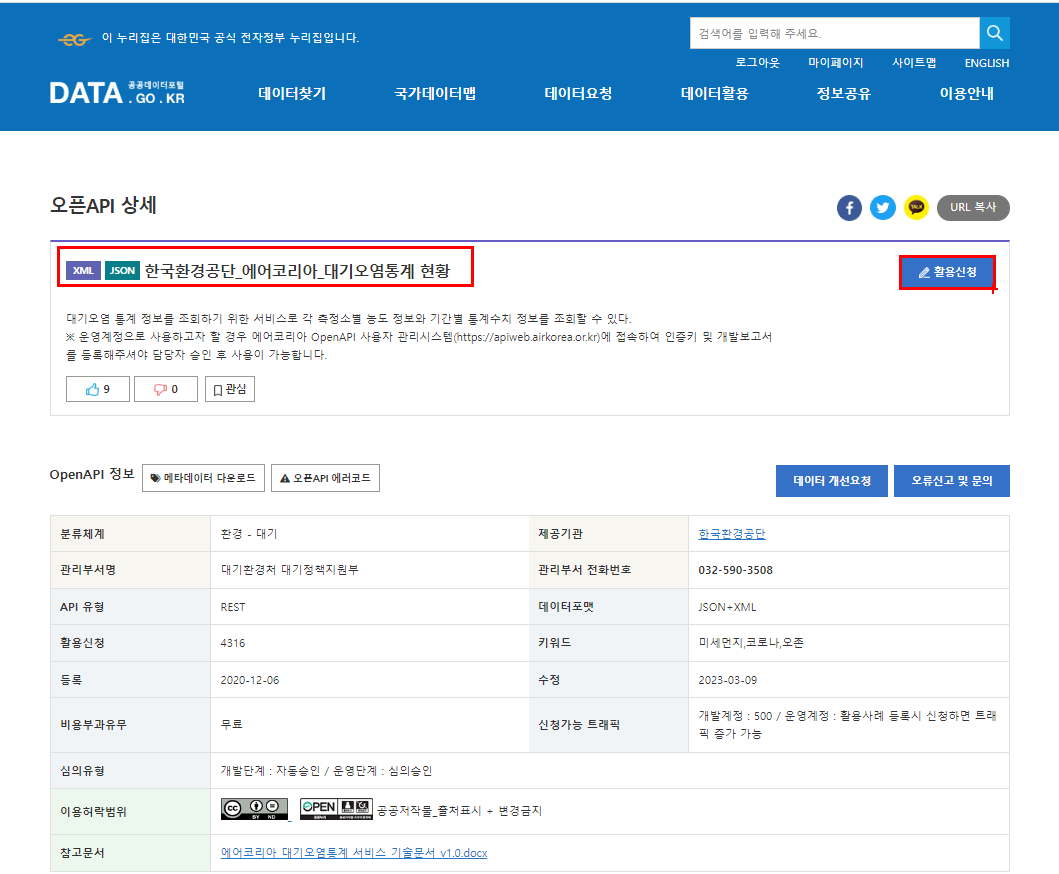

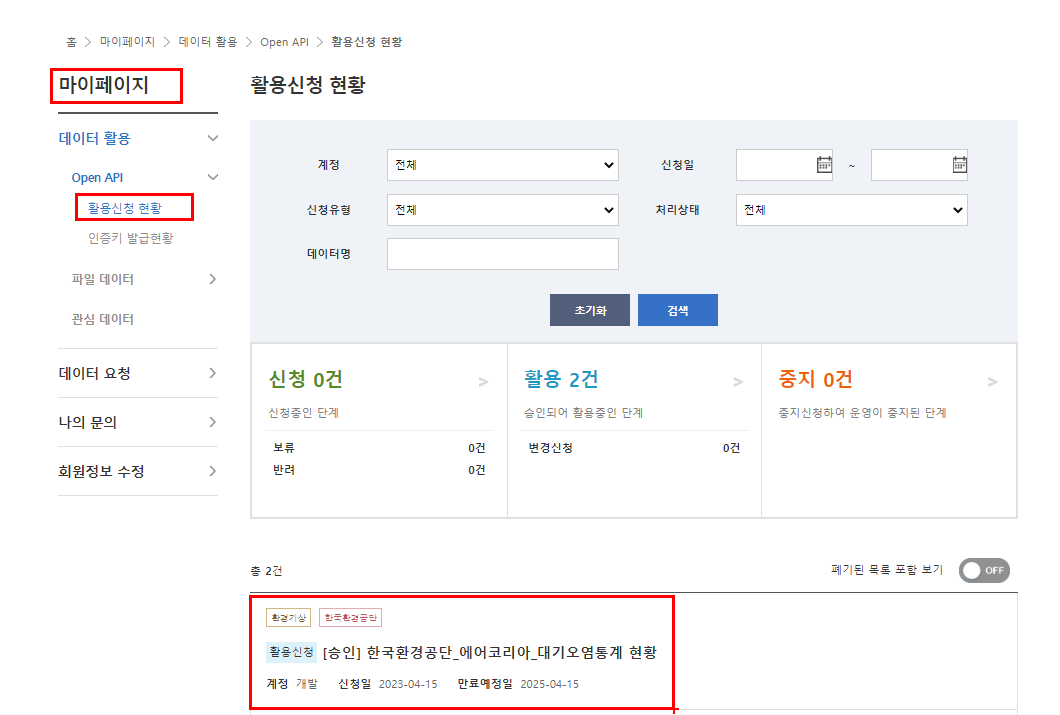

### 이용할 서비스 검토

* 요청변수가 무엇인지?
    * 내가 요청할 때 조절할 수 있는 부분이 무엇인가?
* 필수 요청 변수는 무엇인가?
    * 필수항목이 없으면 URL요청시 에러 발생

* '미리보기'를 통해 대략 받아온 데이터의 내용과 생김새를 파악한다.
    
* 참고문서 확인
    * 웹에 필수/선택항목이 정리된 것도 있지만,
    * 다시한번 해당 참고문서(에어코리아_대기오염통계 서비스_기술문서_v1.0.docx)를 확인 해보는 것을 권장한다.

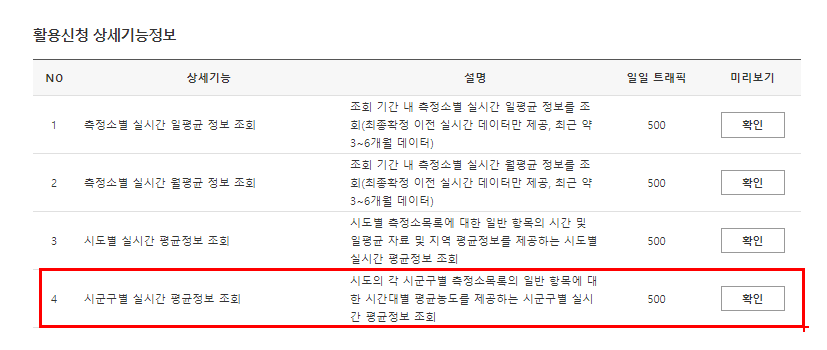

API의 동작을 확인
* 파라미터 종류 및 전달 값 형태를 살펴보세요.
* 받은 데이터의 형태와 원하는 정보가 들어 있는지 확인하세요

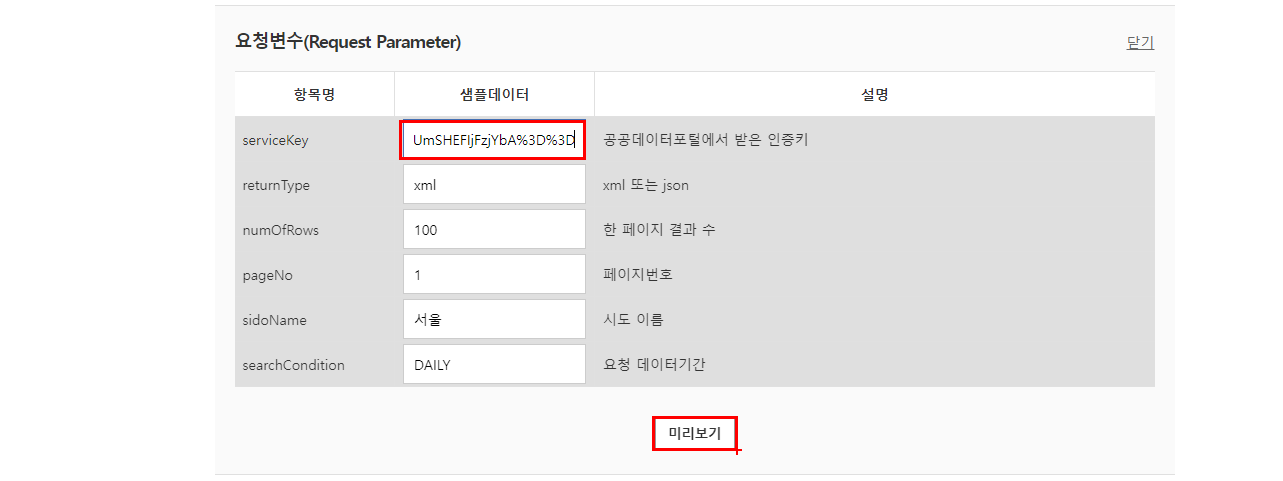

### URL 만들기

* 참고문서/ 웹페이지의 파이썬 예제를 통해서 만든다.
 
- 확인 항목
    - 나의 ServiceKey
    - 필수항목
    - open_api = URL end-point/오퍼레이션명


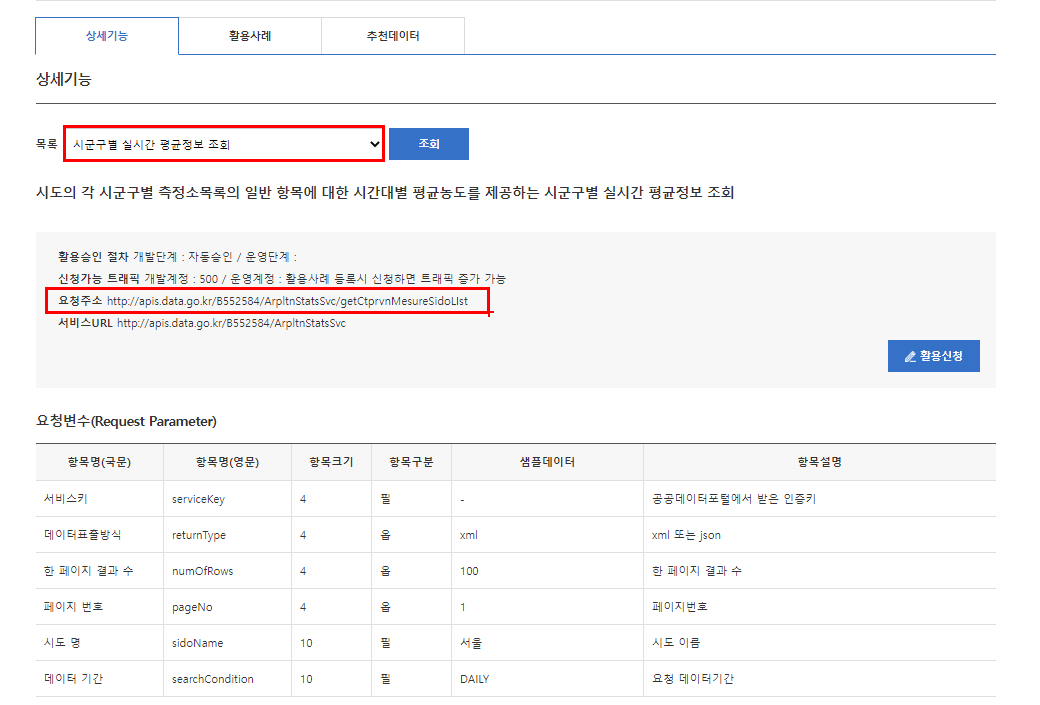

In [2]:
import requests
from urllib import parse

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
# 인코딩용
ServiceKey = parse.unquote('tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ%2FcNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA%2BCBURGJs79vZw%3D%3D')

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

print(res.text)

<?xml version="1.0" encoding="UTF-8"?>
<response>
  <header>
    <resultCode>11</resultCode>
    <resultMsg>NO_MANDATORY_REQUEST_PARAMETERS_ERROR</resultMsg>
  </header>
</response>


> * NO_MANDATORY_REQUEST_PARAMETERS_ERROR의 의미는?
> * 공공API 사용시 메뉴얼을 항상 확인 할 것!!

In [3]:
import requests
from urllib import parse

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
# ServiceKey = parse.unquote('F6M1OtbZgP9W5SNOxDdALQYRbP9z3V73XgfXakb6CNlb6E6RkmNMf%2B3SnaXSCYl2eVlqSYjsUmSHEFIjFzjYbA%3D%3D')

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'서울','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

print(res.text)

<?xml version="1.0" encoding="UTF-8"?>
<response>
  <header>
    <resultCode>00</resultCode>
    <resultMsg>NORMAL_CODE</resultMsg>
  </header>
  <body>
    <items>
      <item>
        <khaiValue>62</khaiValue>
        <so2Value>0.003</so2Value>
        <coValue>0.3</coValue>
        <cityName>강남구</cityName>
        <cityNameEng>Gangnam-gu</cityNameEng>
        <pm10Value>25</pm10Value>
        <dataTime>2023-07-25 14:00</dataTime>
        <no2Value>0.011</no2Value>
        <districtNumSeq>001</districtNumSeq>
        <o3Value>0.044</o3Value>
        <pm25Value>18</pm25Value>
        <sidoName>서울</sidoName>
      </item>
      <item>
        <khaiValue>61</khaiValue>
        <so2Value>0.003</so2Value>
        <coValue>0.3</coValue>
        <cityName>강동구</cityName>
        <cityNameEng>Gangdong-gu</cityNameEng>
        <pm10Value>23</pm10Value>
        <dataTime>2023-07-25 14:00</dataTime>
        <no2Value>0.008</no2Value>
        <districtNumSeq>002</districtNumSeq>
        <o3Value>

In [4]:
# 인증키(Encoding)를 사용할 경우
# 파싱하여 전달(%특수기호 등 문제 일으킴)
parse.unquote('tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ%2FcNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA%2BCBURGJs79vZw%3D%3D')

'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

In [5]:
# 인증키(Encoding)를 사용할 경우
# 파싱하여 전달(%특수기호 등 문제 일으킴)
parse.unquote('tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw==')

'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

## 데이터 출력

### XML 형식 데이터 사용

* XML(Extensible Markup Language)
  - 특정 목적에 따라 데이터를 태그로 감싸서 마크업하는 범용적인 포멧
  - 마크업 언어는 태그 등을 이용하여 데이터의 구조를 기술하는 언어의 한 가지
  - 가장 친숙한 마크업 언어가 HTML
  - XML은 HTML과 마찬가지로 데이터를 계층 구조로 표현
  - XML 기본 구조
```xml
<태그 속성="속성값">내용</태그>
```

* 태그와 속성은 특정 목적에 따라 임의로 이름을 정해서 사용
```xml
<product id="M001" price="300000">32인치 LCD 모니터</product>
```


* 다른 요소와 그룹으로 묶을 수도 있음
```xml
<products type="전자제품">
  <product id="M001" price="300000">32인치 LCD 모니터</product>
  <product id="M002" price="210000">24인치 LCD 모니터</product>
</products>
```

### XML형식 데이터 출력

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(res.content, 'xml')
items = soup.select('item')
for item in items:
    # print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    print(cityName,pm10Value,dataTime)
    break

강남구 25 2023-07-25 14:00


## 종합코드:미세먼지 시도별 실시간 측정정보

In [56]:
import pandas as pd
import requests
from urllib import parse
from bs4 import BeautifulSoup

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
# ServiceKey = parse.unquote('F6M1OtbZgP9W5SNOxDdALQYRbP9z3V73XgfXakb6CNlb6E6RkmNMf%2B3SnaXSCYl2eVlqSYjsUmSHEFIjFzjYbA%3D%3D')

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'서울','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

soup = BeautifulSoup(res.content, 'xml')
items = soup.select('item')
for item in items:
    #print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    print(cityName,pm10Value,dataTime)    

강남구 19 2023-07-25 15:00
강동구 22 2023-07-25 15:00
강북구 21 2023-07-25 15:00
강서구 16 2023-07-25 15:00
관악구 17 2023-07-25 15:00
광진구 20 2023-07-25 15:00
구로구 8 2023-07-25 15:00
금천구 10 2023-07-25 15:00


ValueError: invalid literal for int() with base 10: ''

## 판다스 데이터로 변환

In [60]:
import pandas as pd
import requests
from urllib import parse
from bs4 import BeautifulSoup

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
# ServiceKey = parse.unquote('F6M1OtbZgP9W5SNOxDdALQYRbP9z3V73XgfXakb6CNlb6E6RkmNMf%2B3SnaXSCYl2eVlqSYjsUmSHEFIjFzjYbA%3D%3D')

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'서울','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

soup = BeautifulSoup(res.content, 'xml')
items = soup.select('item')

#  리스트
city_lst = []
pm10_lst = []
dataT_lst = []

for item in items:
    #print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    print(cityName,pm10Value,dataTime)    

    city_lst.append(cityName)
    pm10_lst.append(pd.to_numeric(pm10Value, errors = 'coerce'))
    dataT_lst.append(dataTime)

df = pd.DataFrame({'이름': city_lst, 'PM10': pm10_lst, '측정일시': dataT_lst})
df


강남구 19 2023-07-25 15:00
강동구 22 2023-07-25 15:00
강북구 21 2023-07-25 15:00
강서구 16 2023-07-25 15:00
관악구 17 2023-07-25 15:00
광진구 20 2023-07-25 15:00
구로구 8 2023-07-25 15:00
금천구 10 2023-07-25 15:00
노원구  2023-07-25 15:00
도봉구 11 2023-07-25 15:00
동대문구 18 2023-07-25 15:00
동작구 12 2023-07-25 15:00
마포구 12 2023-07-25 15:00
서대문구 15 2023-07-25 15:00
서초구  2023-07-25 15:00
성동구 19 2023-07-25 15:00
성북구 23 2023-07-25 15:00
송파구 24 2023-07-25 15:00
양천구 17 2023-07-25 15:00
영등포구 13 2023-07-25 15:00
용산구 21 2023-07-25 15:00
은평구 19 2023-07-25 15:00
종로구  2023-07-25 15:00
중구 8 2023-07-25 15:00
중랑구 20 2023-07-25 15:00
강남구 25 2023-07-25 14:00
강동구 23 2023-07-25 14:00
강북구 17 2023-07-25 14:00
강서구 15 2023-07-25 14:00
관악구 19 2023-07-25 14:00
광진구 24 2023-07-25 14:00
구로구 10 2023-07-25 14:00
금천구 15 2023-07-25 14:00
노원구  2023-07-25 14:00
도봉구 11 2023-07-25 14:00
동대문구 25 2023-07-25 14:00
동작구 20 2023-07-25 14:00
마포구 16 2023-07-25 14:00
서대문구 12 2023-07-25 14:00
서초구 33 2023-07-25 14:00
성동구 23 2023-07-25 14:00
성북구 19 2023-07-25 14:0

,이름,PM10,측정일시
0,강남구,19.0,2023-07-25 15:00
1,강동구,22.0,2023-07-25 15:00
2,강북구,21.0,2023-07-25 15:00
3,강서구,16.0,2023-07-25 15:00
4,관악구,17.0,2023-07-25 15:00
...,...,...,...
95,용산구,25.0,2023-07-25 12:00
96,은평구,19.0,2023-07-25 12:00
97,종로구,26.0,2023-07-25 12:00
98,중구,21.0,2023-07-25 12:00


## 미세먼지 심한 순으로 정렬

In [61]:
df = pd.DataFrame({'이름': city_lst, 'PM10': pm10_lst, '측정일시': dataT_lst})
df.sort_values('PM10',ascending=False)

,이름,PM10,측정일시
39,서초구,33.0,2023-07-25 14:00
72,종로구,32.0,2023-07-25 13:00
52,강북구,31.0,2023-07-25 13:00
54,관악구,30.0,2023-07-25 13:00
66,성북구,30.0,2023-07-25 13:00
...,...,...,...
14,서초구,NaN,2023-07-25 15:00
22,종로구,NaN,2023-07-25 15:00
33,노원구,NaN,2023-07-25 14:00
58,노원구,NaN,2023-07-25 13:00


In [62]:
import datetime

# 오늘 날짜
dateStr = datetime.datetime.now().strftime('%Y%m%d')
dateStr

'20230725'

In [63]:
#날짜 지정하여 저장
df.to_excel(f'./data/airseoul-{dateStr}.xlsx')


## 미션1: PM10,PM25 표시되도록 하세요.

In [68]:
import pandas as pd
import requests
from urllib import parse
from bs4 import BeautifulSoup

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
# ServiceKey = parse.unquote('F6M1OtbZgP9W5SNOxDdALQYRbP9z3V73XgfXakb6CNlb6E6RkmNMf%2B3SnaXSCYl2eVlqSYjsUmSHEFIjFzjYbA%3D%3D')

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'서울','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

soup = BeautifulSoup(res.content, 'xml')
items = soup.select('item')

#  리스트
city_lst = []
pm10_lst = []
dataT_lst = []
pm25_lst = []

for item in items:
    #print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    pm25Value = item.select_one('pm25Value').text
       

    city_lst.append(cityName)
    pm10_lst.append(pd.to_numeric(pm10Value, errors = 'coerce'))
    dataT_lst.append(dataTime)
    pm25_lst.append(pd.to_numeric(pm25Value, errors = 'coerce'))

df = pd.DataFrame({'이름': city_lst, 'PM10': pm10_lst, 'PM25': pm25_lst ,'측정일시': dataT_lst})
df







,이름,PM10,PM25,측정일시
0,강남구,16.0,9.0,2023-07-25 16:00
1,강동구,18.0,11.0,2023-07-25 16:00
2,강북구,18.0,10.0,2023-07-25 16:00
3,강서구,9.0,8.0,2023-07-25 16:00
4,관악구,13.0,6.0,2023-07-25 16:00
...,...,...,...,...
95,용산구,22.0,21.0,2023-07-25 13:00
96,은평구,17.0,13.0,2023-07-25 13:00
97,종로구,32.0,17.0,2023-07-25 13:00
98,중구,27.0,26.0,2023-07-25 13:00


In [73]:
#가장 최근에 PM10 농도가 가장 높은 지역구는?
# PM10, PM25 농도가 가장 높은 지역구를 찾으셈

df.sort_values(['PM10','PM25'],ascending=False)

,이름,PM10,PM25,측정일시
64,서초구,33.0,7.0,2023-07-25 14:00
97,종로구,32.0,17.0,2023-07-25 13:00
77,강북구,31.0,18.0,2023-07-25 13:00
91,성북구,30.0,17.0,2023-07-25 13:00
79,관악구,30.0,13.0,2023-07-25 13:00
...,...,...,...,...
33,노원구,NaN,NaN,2023-07-25 15:00
39,서초구,NaN,NaN,2023-07-25 15:00
47,종로구,NaN,NaN,2023-07-25 15:00
58,노원구,NaN,NaN,2023-07-25 14:00


## 미션2: 서울 이외 지역 미세먼지 정보 및 추가 정보 1개를 추가해서 표시하세요.

In [74]:
import pandas as pd
import requests
from urllib import parse
from bs4 import BeautifulSoup

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
# ServiceKey = parse.unquote('F6M1OtbZgP9W5SNOxDdALQYRbP9z3V73XgfXakb6CNlb6E6RkmNMf%2B3SnaXSCYl2eVlqSYjsUmSHEFIjFzjYbA%3D%3D')

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'tC3v5Lh6ZoW7dJf6lzw9E13FhLwP5bgJ/cNDkqvzb3Rhj7t6OKUglYGYep5Va4WCJhm1BxXTA+CBURGJs79vZw=='

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'경기','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

soup = BeautifulSoup(res.content, 'xml')
items = soup.select('item')

#  리스트
city_lst = []
pm10_lst = []
dataT_lst = []
pm25_lst = []
o3_lst = []

for item in items:
    #print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    pm25Value = item.select_one('pm25Value').text
    o3Value = item.select_one('o3Value').text

       

    city_lst.append(cityName)
    pm10_lst.append(pd.to_numeric(pm10Value, errors = 'coerce'))
    dataT_lst.append(dataTime)
    pm25_lst.append(pd.to_numeric(pm25Value, errors = 'coerce'))
    o3_lst.append(o3Value)

df = pd.DataFrame({'이름': city_lst, 'PM10': pm10_lst, 'PM25': pm25_lst ,'측정일시': dataT_lst, '오존 농도': o3_lst})
df







,이름,PM10,PM25,측정일시,오존 농도
0,가평군,24,4.0,2023-07-25 16:00,0.062
1,고양시,17,11.0,2023-07-25 16:00,0.042
2,과천시,21,5.0,2023-07-25 16:00,0.033
3,광명시,14,7.0,2023-07-25 16:00,0.033
4,광주시,16,6.0,2023-07-25 16:00,0.041
...,...,...,...,...,...
95,과천시,22,11.0,2023-07-25 13:00,0.053
96,광명시,21,15.0,2023-07-25 13:00,0.041
97,광주시,18,8.0,2023-07-25 13:00,0.050
98,구리시,22,14.0,2023-07-25 13:00,0.049


In [51]:
df[df['이름']=='의왕시'].sort_values('측정일시',ascending=False)

,이름,PM10,PM25,측정일시
23,의왕시,24,6,2023-04-15 13:00
54,의왕시,39,11,2023-04-15 12:00
85,의왕시,56,14,2023-04-15 11:00
